In [1]:
%load_ext autoreload
%autoreload 2

from msr.training.data.datasets import SleepEDFDataset
from msr.training.data.datamodules import SleepEDFDataModule

SPLITS = ["train", "val", "test"]

---
# **Whole signal**

**`whole_signal_waveforms`**

SleepEDFDataModule (whole_signal_waveforms)
  info       = {0: 'Sleep stage W', 1: 'Sleep stage 1', 2: 'Sleep stage 2', 3: 'Sleep stage 3', 4: 'Sleep stage 4', 5: 'Sleep stage R', 6: 'Sleep stage M'}

  Train SleepEDFDataset:
    data_shape            = torch.Size([135740, 3000, 3])
    classes_counts        = {'Sleep stage 2': 47382, 'Sleep stage W': 46528, 'Sleep stage R': 18194, 'Sleep stage 1': 14907, 'Sleep stage 3': 5940, 'Sleep stage 4': 2789, 'Sleep stage M': 0}

  Val SleepEDFDataset:
    data_shape            = torch.Size([28757, 3000, 3])
    classes_counts        = {'Sleep stage 2': 10318, 'Sleep stage W': 9613, 'Sleep stage R': 3487, 'Sleep stage 1': 3303, 'Sleep stage 3': 1154, 'Sleep stage 4': 882, 'Sleep stage M': 0}

  Test SleepEDFDataset:
    data_shape            = torch.Size([31853, 3000, 3])
    classes_counts        = {'Sleep stage 2': 11432, 'Sleep stage W': 10681, 'Sleep stage R': 4154, 'Sleep stage 1': 3312, 'Sleep stage 3': 1699, 'Sleep stage 4': 575, 'Sleep 

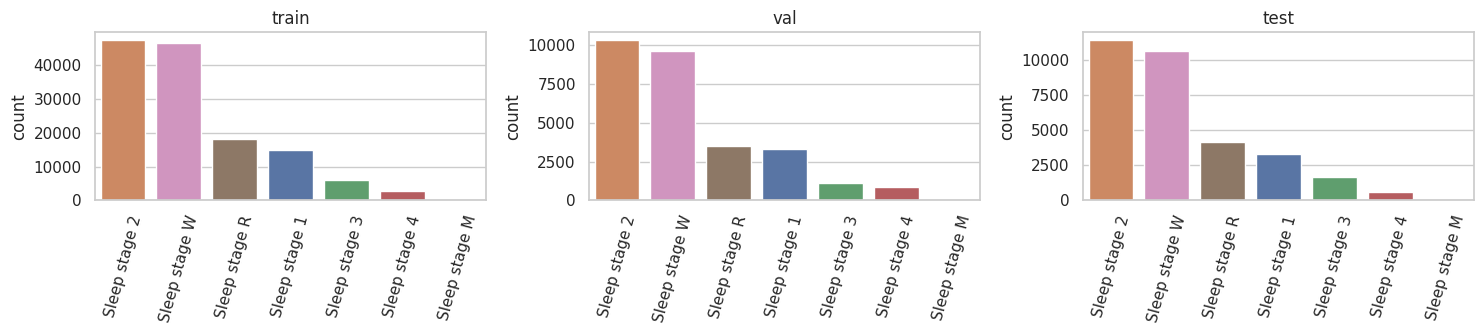

In [2]:
dm = SleepEDFDataModule("whole_signal_waveforms")
dm.setup(); dm.plot_targets(); print(dm.describe(ds_fields=['data_shape', 'classes_counts'], dm_fields=['info']))

**`whole_signal_features`**

In [3]:
dm = SleepEDFDataModule("whole_signal_features")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

SleepEDFDataModule (whole_signal_features)
  
  Train SleepEDFDataset:
    data_shape            = torch.Size([135740, 26])

  Val SleepEDFDataset:
    data_shape            = torch.Size([28757, 26])

  Test SleepEDFDataset:
    data_shape            = torch.Size([31853, 26])


---
# **Windows**

**`windows_waveforms`**

In [4]:
dm = SleepEDFDataModule("windows_waveforms")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

SleepEDFDataModule (windows_waveforms)
  
  Train SleepEDFDataset:
    data_shape            = torch.Size([135740, 3, 1000, 3])

  Val SleepEDFDataset:
    data_shape            = torch.Size([28757, 3, 1000, 3])

  Test SleepEDFDataset:
    data_shape            = torch.Size([31853, 3, 1000, 3])


**`windows_features`**

In [5]:
dm = SleepEDFDataModule("windows_features")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

SleepEDFDataModule (windows_features)
  
  Train SleepEDFDataset:
    data_shape            = torch.Size([135740, 3, 25])

  Val SleepEDFDataset:
    data_shape            = torch.Size([28757, 3, 25])

  Test SleepEDFDataset:
    data_shape            = torch.Size([31853, 3, 25])


---